# PWP Model Analysis


In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Experiment 2: Mixing Experiments

### Arabian Sea

In [3]:
as_1 = xr.open_dataset("70e15n/output/pwp_output_exp2_run1.nc")
as_2 = xr.open_dataset("70e15n/output/pwp_output_exp2_run2.nc")
as_3 = xr.open_dataset("70e15n/output/pwp_output_exp2_run3.nc")
as_4 = xr.open_dataset("70e15n/output/pwp_output_exp2_run4.nc")

In [4]:
as_1 = as_1.sel(time=slice('196.', '197.'))
as_2 = as_2.sel(time=slice('196.', '197.'))
as_3 = as_3.sel(time=slice('196.', '197.'))
as_4 = as_4.sel(time=slice('196.', '197.'))


temp1_as = as_1["temp"][:,3]
temp2_as = as_2["temp"][:,3]
temp3_as = as_3["temp"][:,3]
temp4_as = as_4["temp"][:,3]

(250.0, 0.0)

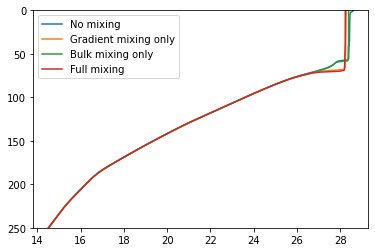

In [5]:
plt.figure(2)
plt.plot(temp1_as.values,temp1_as.z.values, label="No mixing")
plt.plot(temp2_as.values,temp2_as.z.values, label="Gradient mixing only")
plt.plot(temp3_as.values,temp3_as.z.values, label="Bulk mixing only")
plt.plot(temp4_as.values,temp4_as.z.values, label="Full mixing")

plt.legend()
plt.ylim(250,0)

In [6]:
sal1_as = as_1["sal"][:,3]
sal2_as = as_2["sal"][:,3]
sal3_as = as_3["sal"][:,3]
sal4_as = as_4["sal"][:,3]

(250.0, 0.0)

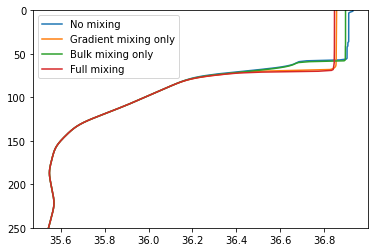

In [7]:
plt.figure(3)
plt.plot(sal1_as.values,sal1_as.z.values, label="No mixing")
plt.plot(sal2_as.values,sal2_as.z.values, label="Gradient mixing only")
plt.plot(sal3_as.values,sal3_as.z.values, label="Bulk mixing only")
plt.plot(sal4_as.values,sal4_as.z.values, label="Full mixing")

plt.legend()
plt.ylim(250,0)

(75.0, 0.0)

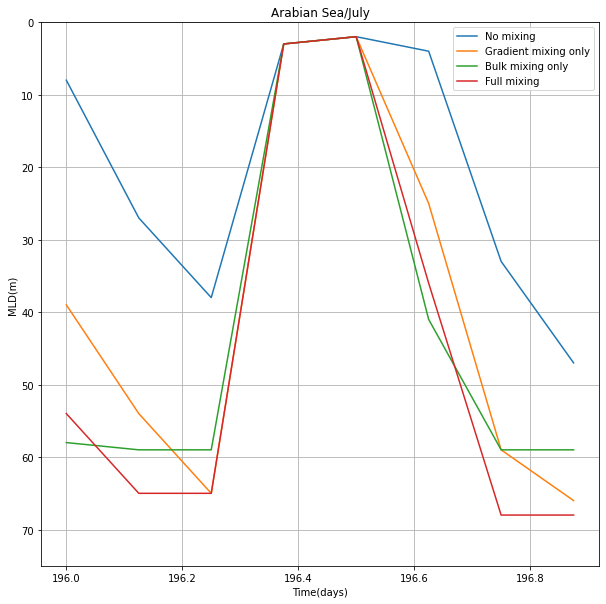

In [8]:
plt.figure(4, figsize=(10,10))

as_1["mld"].plot(label="No mixing")
as_2["mld"].plot(label="Gradient mixing only")
as_3["mld"].plot(label="Bulk mixing only")
as_4["mld"].plot(label="Full mixing")

plt.title("Arabian Sea/July")
plt.grid(axis='both')
plt.ylabel("MLD(m)")
plt.xlabel("Time(days)")
plt.legend()
plt.ylim(75,0)

In [9]:
forcing_file_as = xr.open_dataset("70e15n/input_data/forcings_70e15n.nc")
forcing_file_as

<xarray.Dataset>
Dimensions:  (time: 2920, dtime: 2920)
Coordinates:
  * dtime    (dtime) datetime64[ns] 2013-01-01 ... 2013-12-31T21:00:00
  * time     (time) float64 0.0 0.125 0.25 0.375 0.5 ... 364.5 364.6 364.8 364.9
Data variables:
    qlat     (time) float64 ...
    tx       (time) float64 ...
    ty       (time) float64 ...
    sw       (time) float64 ...
    lw       (time) float64 ...
    precip   (time) float64 ...
    qsens    (time) float64 ...
Attributes:
    description:  Forcings for 70E 15N

<Figure size 1728x2592 with 0 Axes>

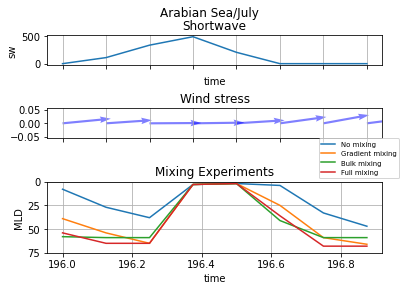

In [10]:
plt.figure(4, figsize=(24,36))
f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[1.25,1.25,3]})
f.subplots_adjust(hspace=1)

forcing_file_as["sw"].sel(time=slice('196.', '197.')).plot(ax=a0)
a0.set_xticks(ticks=np.arange(196.,197.,0.125), labels=[])
a0.set_yticks(ticks=[0.,500.])
a0.set_title("Shortwave")
a0.grid(axis='x')

tx = forcing_file_as["tx"].sel(time=slice('196.', '197.'))
ty = forcing_file_as["ty"].sel(time=slice('196.', '197.'))
a1.quiver(tx.time.values,0,tx,ty,color='b',
               units='y',
               scale_units='y',
               scale = 1,
               width=0.008,
               alpha=0.5)
a1.set_xticks(ticks=np.arange(196.,197.,0.125), labels=[])
a1.set_yticks(ticks=[-0.05,0.,0.05], label="N/m2")
a1.set_title("Wind stress")
a1.grid(axis='x')

as_1["mld"].plot(ax=a2, label="No mixing", subplot_kws={"xlabel":"None"})
as_2["mld"].plot(ax=a2, label="Gradient mixing", subplot_kws={"xlabel":"None"})
as_3["mld"].plot(ax=a2, label="Bulk mixing", subplot_kws={"xlabel":"None"})
as_4["mld"].plot(ax=a2, label="Full mixing", subplot_kws={"xlabel":"None"})

plt.title("Mixing Experiments")
plt.grid(axis='both', which="major")
plt.ylabel("MLD")
a2.legend(fontsize='x-small', bbox_to_anchor=(0.8,1.0))
plt.ylim(75,0)

f.suptitle("Arabian Sea/July", fontsize=12.)
plt.savefig("as_july.pdf")
#f.tight_layout()

### Bay of Bengal

#### 1.) Summer Monsoon(JJAS)

In [3]:
bob_1 = xr.open_dataset("85e15n/output/pwp_output_exp2_run1.nc")
bob_2 = xr.open_dataset("85e15n/output/pwp_output_exp2_run2.nc")
bob_3 = xr.open_dataset("85e15n/output/pwp_output_exp2_run3.nc")
bob_4 = xr.open_dataset("85e15n/output/pwp_output_exp2_run4.nc")

In [4]:
forcing_file_bob = xr.open_dataset("85e15n/input_data/forcings_85e15n.nc")
forcing_file_bob

<xarray.Dataset>
Dimensions:  (time: 2920, dtime: 2920)
Coordinates:
  * dtime    (dtime) datetime64[ns] 2013-01-01 ... 2013-12-31T21:00:00
  * time     (time) float64 0.0 0.125 0.25 0.375 0.5 ... 364.5 364.6 364.8 364.9
Data variables:
    qlat     (time) float32 ...
    tx       (time) float32 ...
    ty       (time) float32 ...
    sw       (time) float32 ...
    lw       (time) float32 ...
    precip   (time) float32 ...
    qsens    (time) float32 ...
Attributes:
    description:  Forcings for 85E 15N

In [5]:
def get_date(dataset_name,value):
    for time in range(len(dataset_name.time)):
        if (dataset_name.time[time] == value):
            print(dataset_name.dtime[time].values)

In [6]:
get_date(forcing_file_bob,216.)
get_date(forcing_file_bob,217.)

2013-08-05T00:00:00.000000000
2013-08-06T00:00:00.000000000


In [7]:
bob_1 = bob_1.sel(time=slice('216.', '217.125'))
bob_2 = bob_2.sel(time=slice('216.', '217.125'))
bob_3 = bob_3.sel(time=slice('216.', '217.125'))
bob_4 = bob_4.sel(time=slice('216.', '217.125'))
bob_1

<xarray.Dataset>
Dimensions:  (z: 251, time: 10)
Coordinates:
  * z        (z) float64 0.0 1.0 2.0 3.0 4.0 ... 246.0 247.0 248.0 249.0 250.0
  * time     (time) float64 216.0 216.1 216.2 216.4 ... 216.8 216.9 217.0 217.1
Data variables:
    temp     (z, time) float64 ...
    sal      (z, time) float64 ...
    uvel     (z, time) float64 ...
    vvel     (z, time) float64 ...
    dens     (z, time) float64 ...
    mld      (time) float64 ...

(75.0, 0.0)

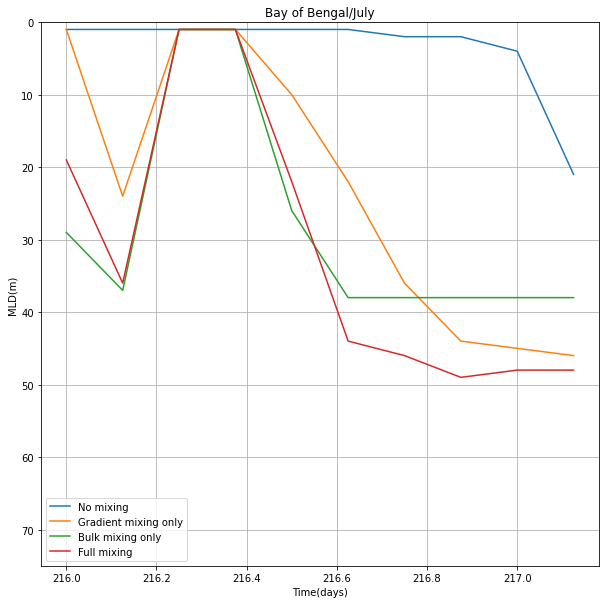

In [8]:
plt.figure(figsize=(10,10))

bob_1["mld"].plot(label="No mixing")
bob_2["mld"].plot(label="Gradient mixing only")
bob_3["mld"].plot(label="Bulk mixing only")
bob_4["mld"].plot(label="Full mixing")

plt.title("Bay of Bengal/July")
plt.grid(axis='both')
plt.ylabel("MLD(m)")
plt.xlabel("Time(days)")
plt.legend()
plt.ylim(75,0)

<Figure size 1728x2592 with 0 Axes>

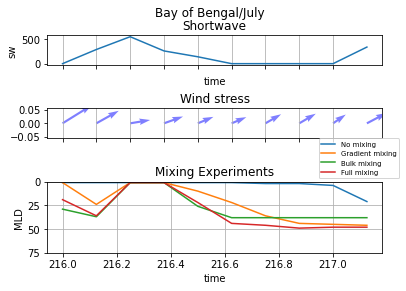

In [9]:
plt.figure(figsize=(24,36))
f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[1.25,1.25,3]})
f.subplots_adjust(hspace=1)

forcing_file_bob["sw"].sel(time=slice('216.', '217.125')).plot(ax=a0)
a0.set_xticks(ticks=np.arange(216.,217.125,0.125), labels=[])
a0.set_yticks(ticks=[0.,500.])
a0.set_title("Shortwave")
a0.grid(axis='x')

tx = forcing_file_bob["tx"].sel(time=slice('216.', '217.125'))
ty = forcing_file_bob["ty"].sel(time=slice('216.', '217.125'))
a1.quiver(tx.time.values,0,tx,ty,color='b',
               units='y',
               scale_units='y',
               scale = 2,
               width=0.008,
               alpha=0.5)
a1.set_xticks(ticks=np.arange(216.,217.125,0.125), labels=[])
a1.set_yticks(ticks=[-0.05,0.,0.05], label="N/m2")
a1.set_title("Wind stress")
a1.grid(axis='x')

bob_1["mld"].plot(ax=a2, label="No mixing", subplot_kws={"xlabel":"None"})
bob_2["mld"].plot(ax=a2, label="Gradient mixing", subplot_kws={"xlabel":"None"})
bob_3["mld"].plot(ax=a2, label="Bulk mixing", subplot_kws={"xlabel":"None"})
bob_4["mld"].plot(ax=a2, label="Full mixing", subplot_kws={"xlabel":"None"})

plt.title("Mixing Experiments")
plt.grid(axis='both', which="major")
plt.ylabel("MLD")
a2.legend(fontsize='x-small', bbox_to_anchor=(0.8,1.0))
plt.ylim(75,0)

f.suptitle("Bay of Bengal/July", fontsize=12.)
plt.savefig("bob_july.pdf")

<Figure size 1728x2592 with 0 Axes>

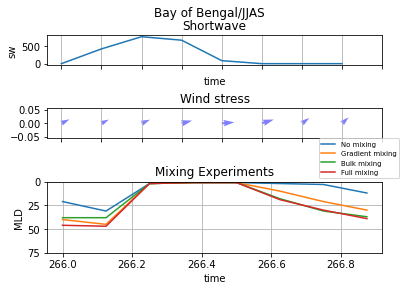

In [27]:
bob_1 = xr.open_dataset("85e15n/output/pwp_output_exp2_run1.nc")
bob_2 = xr.open_dataset("85e15n/output/pwp_output_exp2_run2.nc")
bob_3 = xr.open_dataset("85e15n/output/pwp_output_exp2_run3.nc")
bob_4 = xr.open_dataset("85e15n/output/pwp_output_exp2_run4.nc")

forcing_file_bob = xr.open_dataset("85e15n/input_data/forcings_85e15n.nc")

bob_1 = bob_1.sel(time=slice('266.', '267.'))
bob_2 = bob_2.sel(time=slice('266.', '267.'))
bob_3 = bob_3.sel(time=slice('266.', '267.'))
bob_4 = bob_4.sel(time=slice('266.', '267.'))


plt.figure(figsize=(24,36))
f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[1.25,1.25,3]})
f.subplots_adjust(hspace=1)

forcing_file_bob["sw"].sel(time=slice('266.', '267.')).plot(ax=a0)
a0.set_xticks(ticks=np.arange(266.,267.125,0.125), labels=[])
a0.set_yticks(ticks=[0.,500.])
a0.set_title("Shortwave")
a0.grid(axis='x')

tx = forcing_file_bob["tx"].sel(time=slice('266.', '267.'))
ty = forcing_file_bob["ty"].sel(time=slice('266.', '267.'))
a1.quiver(tx.time.values,0,tx,ty,color='b',
               units='y',
               scale_units='y',
               scale = 2,
               width=0.008,
               alpha=0.5)
a1.set_xticks(ticks=np.arange(266.,267.125,0.125), labels=[])
a1.set_yticks(ticks=[-0.05,0.,0.05], label="N/m2")
a1.set_title("Wind stress")
a1.grid(axis='x')

bob_1["mld"].plot(ax=a2, label="No mixing", subplot_kws={"xlabel":"None"})
bob_2["mld"].plot(ax=a2, label="Gradient mixing", subplot_kws={"xlabel":"None"})
bob_3["mld"].plot(ax=a2, label="Bulk mixing", subplot_kws={"xlabel":"None"})
bob_4["mld"].plot(ax=a2, label="Full mixing", subplot_kws={"xlabel":"None"})

plt.title("Mixing Experiments")
plt.grid(axis='both', which="major")
plt.ylabel("MLD")
a2.legend(fontsize='x-small', bbox_to_anchor=(0.8,1.0))
plt.ylim(75,0)

f.suptitle("Bay of Bengal/JJAS", fontsize=12.)
plt.savefig("bob_sep.pdf")

<Figure size 1728x2592 with 0 Axes>

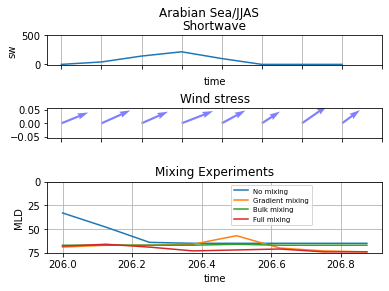

In [22]:
as_1 = xr.open_dataset("70e15n/output/pwp_output_exp2_run1.nc")
as_2 = xr.open_dataset("70e15n/output/pwp_output_exp2_run2.nc")
as_3 = xr.open_dataset("70e15n/output/pwp_output_exp2_run3.nc")
as_4 = xr.open_dataset("70e15n/output/pwp_output_exp2_run4.nc")

forcing_file_as = xr.open_dataset("70e15n/input_data/forcings_70e15n.nc")

as_1 = as_1.sel(time=slice('206.', '207.'))
as_2 = as_2.sel(time=slice('206.', '207.'))
as_3 = as_3.sel(time=slice('206.', '207.'))
as_4 = as_4.sel(time=slice('206.', '207.'))


plt.figure(figsize=(24,36))
f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[1.25,1.25,3]})
f.subplots_adjust(hspace=1)

forcing_file_as["sw"].sel(time=slice('206.', '207.')).plot(ax=a0)
a0.set_xticks(ticks=np.arange(206.,207.125,0.125), labels=[])
a0.set_yticks(ticks=[0.,500.])
a0.set_title("Shortwave")
a0.grid(axis='x')

tx = forcing_file_as["tx"].sel(time=slice('206.', '207.'))
ty = forcing_file_as["ty"].sel(time=slice('206.', '207.'))
a1.quiver(tx.time.values,0,tx,ty,color='b',
               units='y',
               scale_units='y',
               scale = 2,
               width=0.008,
               alpha=0.5)
a1.set_xticks(ticks=np.arange(206.,207.125,0.125), labels=[])
a1.set_yticks(ticks=[-0.05,0.,0.05], label="N/m2")
a1.set_title("Wind stress")
a1.grid(axis='x')

as_1["mld"].plot(ax=a2, label="No mixing", subplot_kws={"xlabel":"None"})
as_2["mld"].plot(ax=a2, label="Gradient mixing", subplot_kws={"xlabel":"None"})
as_3["mld"].plot(ax=a2, label="Bulk mixing", subplot_kws={"xlabel":"None"})
as_4["mld"].plot(ax=a2, label="Full mixing", subplot_kws={"xlabel":"None"})

plt.title("Mixing Experiments")
plt.grid(axis='both', which="major")
plt.ylabel("MLD")
a2.legend(fontsize='x-small', bbox_to_anchor=(0.8,1.0))
plt.ylim(75,0)

f.suptitle("Arabian Sea/JJAS", fontsize=12.)
plt.savefig("as_sep.pdf")

In [45]:
get_date(forcing_file_bob,336.)
get_date(forcing_file_bob,337.)

2013-12-03T00:00:00.000000000
2013-12-04T00:00:00.000000000


<Figure size 1728x2592 with 0 Axes>

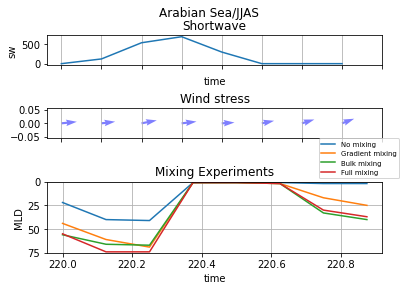

In [26]:
as_1 = xr.open_dataset("70e15n/output/pwp_output_exp2_run1.nc")
as_2 = xr.open_dataset("70e15n/output/pwp_output_exp2_run2.nc")
as_3 = xr.open_dataset("70e15n/output/pwp_output_exp2_run3.nc")
as_4 = xr.open_dataset("70e15n/output/pwp_output_exp2_run4.nc")

forcing_file_as = xr.open_dataset("70e15n/input_data/forcings_70e15n.nc")

as_1 = as_1.sel(time=slice('220.', '221.'))
as_2 = as_2.sel(time=slice('220.', '221.'))
as_3 = as_3.sel(time=slice('220.', '221.'))
as_4 = as_4.sel(time=slice('220.', '221.'))


plt.figure(figsize=(24,36))
f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[1.25,1.25,3]})
f.subplots_adjust(hspace=1)

forcing_file_as["sw"].sel(time=slice('220.', '221.')).plot(ax=a0)
a0.set_xticks(ticks=np.arange(220.,221.125,0.125), labels=[])
a0.set_yticks(ticks=[0.,500.])
a0.set_title("Shortwave")
a0.grid(axis='x')

tx = forcing_file_as["tx"].sel(time=slice('220.', '221.'))
ty = forcing_file_as["ty"].sel(time=slice('220.', '221.'))
a1.quiver(tx.time.values,0,tx,ty,color='b',
               units='y',
               scale_units='y',
               scale = 2,
               width=0.008,
               alpha=0.5)
a1.set_xticks(ticks=np.arange(220.,221.125,0.125), labels=[])
a1.set_yticks(ticks=[-0.05,0.,0.05], label="N/m2")
a1.set_title("Wind stress")
a1.grid(axis='x')

as_1["mld"].plot(ax=a2, label="No mixing", subplot_kws={"xlabel":"None"})
as_2["mld"].plot(ax=a2, label="Gradient mixing", subplot_kws={"xlabel":"None"})
as_3["mld"].plot(ax=a2, label="Bulk mixing", subplot_kws={"xlabel":"None"})
as_4["mld"].plot(ax=a2, label="Full mixing", subplot_kws={"xlabel":"None"})

plt.title("Mixing Experiments")
plt.grid(axis='both', which="major")
plt.ylabel("MLD")
a2.legend(fontsize='x-small', bbox_to_anchor=(0.8,1.0))
plt.ylim(75,0)

f.suptitle("Arabian Sea/JJAS", fontsize=12.)
plt.savefig("as_sep.pdf")

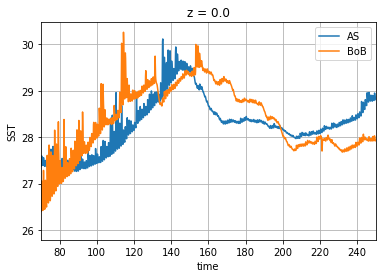

In [43]:
## SST Comparision
bob_4 = xr.open_dataset("85e15n/output/pwp_output_exp2_run4.nc")
as_4 = xr.open_dataset("70e15n/output/pwp_output_exp2_run4.nc")

bob_4 = bob_4["temp"].sel(time=slice('166.','267.'))
as_4 = as_4["temp"].sel(time=slice('166.','267.'))

plt.figure()
as_4.isel(z=0).plot(label="AS")
bob_4.isel(z=0).plot(label="BoB")
plt.xlim(70,250)
plt.ylabel("SST")
plt.grid()
plt.legend()

<Figure size 1728x2592 with 0 Axes>

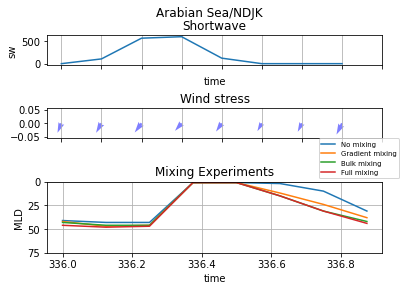

In [46]:
as_1 = xr.open_dataset("70e15n/output/pwp_output_exp2_run1.nc")
as_2 = xr.open_dataset("70e15n/output/pwp_output_exp2_run2.nc")
as_3 = xr.open_dataset("70e15n/output/pwp_output_exp2_run3.nc")
as_4 = xr.open_dataset("70e15n/output/pwp_output_exp2_run4.nc")

forcing_file_as = xr.open_dataset("70e15n/input_data/forcings_70e15n.nc")

as_1 = as_1.sel(time=slice('336.', '337.'))
as_2 = as_2.sel(time=slice('336.', '337.'))
as_3 = as_3.sel(time=slice('336.', '337.'))
as_4 = as_4.sel(time=slice('336.', '337.'))


plt.figure(figsize=(24,36))
f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[1.25,1.25,3]})
f.subplots_adjust(hspace=1)

forcing_file_as["sw"].sel(time=slice('336.', '337.')).plot(ax=a0)
a0.set_xticks(ticks=np.arange(336.,337.125,0.125), labels=[])
a0.set_yticks(ticks=[0.,500.])
a0.set_title("Shortwave")
a0.grid(axis='x')

tx = forcing_file_as["tx"].sel(time=slice('336.', '337.'))
ty = forcing_file_as["ty"].sel(time=slice('336.', '337.'))
a1.quiver(tx.time.values,0,tx,ty,color='b',
               units='y',
               scale_units='y',
               scale = 2,
               width=0.008,
               alpha=0.5)
a1.set_xticks(ticks=np.arange(336.,337.125,0.125), labels=[])
a1.set_yticks(ticks=[-0.05,0.,0.05], label="N/m2")
a1.set_title("Wind stress")
a1.grid(axis='x')

as_1["mld"].plot(ax=a2, label="No mixing", subplot_kws={"xlabel":"None"})
as_2["mld"].plot(ax=a2, label="Gradient mixing", subplot_kws={"xlabel":"None"})
as_3["mld"].plot(ax=a2, label="Bulk mixing", subplot_kws={"xlabel":"None"})
as_4["mld"].plot(ax=a2, label="Full mixing", subplot_kws={"xlabel":"None"})

plt.title("Mixing Experiments")
plt.grid(axis='both', which="major")
plt.ylabel("MLD")
a2.legend(fontsize='x-small', bbox_to_anchor=(0.8,1.0))
plt.ylim(75,0)

f.suptitle("Arabian Sea/NDJK", fontsize=12.)
plt.savefig("as_dec.pdf")

### NDJF

TypeError: No numeric data to plot.

<Figure size 1728x2592 with 0 Axes>

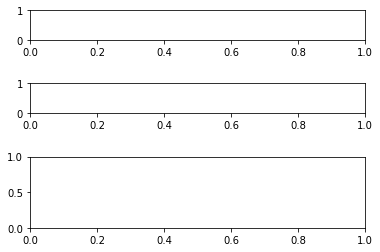

In [70]:
as_1 = xr.open_dataset("70e15n/output/pwp_output_exp2_run1.nc")
as_2 = xr.open_dataset("70e15n/output/pwp_output_exp2_run2.nc")
as_3 = xr.open_dataset("70e15n/output/pwp_output_exp2_run3.nc")
as_4 = xr.open_dataset("70e15n/output/pwp_output_exp2_run4.nc")

forcing_file_as = xr.open_dataset("70e15n/input_data/forcings_70e15n.nc")

as_1 = as_1.sel(time=slice('66.', '67.'))
as_2 = as_2.sel(time=slice('66.', '67.'))
as_3 = as_3.sel(time=slice('66.', '67.'))
as_4 = as_4.sel(time=slice('66.', '67.'))


plt.figure(figsize=(24,36))
f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[1.25,1.25,3]})
f.subplots_adjust(hspace=1)

forcing_file_as["sw"].sel(time=slice('66.', '67.')).plot(ax=a0)
a0.set_xticks(ticks=np.arange(56.,57.125,0.125), labels=[])
a0.set_yticks(ticks=[0.,500.])
a0.set_title("Shortwave")
a0.grid(axis='x')

tx = forcing_file_as["tx"].sel(time=slice('66.', '67.'))
ty = forcing_file_as["ty"].sel(time=slice('66.', '67.'))
a1.quiver(tx.time.values,0,tx,ty,color='b',
               units='y',
               scale_units='y',
               scale = 2,
               width=0.008,
               alpha=0.5)
a1.set_xticks(ticks=np.arange(66.,67.125,0.125), labels=[])
a1.set_yticks(ticks=[-0.05,0.,0.05], label="N/m2")
a1.set_title("Wind stress")
a1.grid(axis='x')

as_1["mld"].plot(ax=a2, label="No mixing", subplot_kws={"xlabel":"None"})
as_2["mld"].plot(ax=a2, label="Gradient mixing", subplot_kws={"xlabel":"None"})
as_3["mld"].plot(ax=a2, label="Bulk mixing", subplot_kws={"xlabel":"None"})
as_4["mld"].plot(ax=a2, label="Full mixing", subplot_kws={"xlabel":"None"})

plt.title("Mixing Experiments")
plt.grid(axis='both', which="major")
plt.ylabel("MLD")
a2.legend(fontsize='x-small', bbox_to_anchor=(0.8,1.0))
plt.ylim(75,0)

f.suptitle("Arabian Sea/NDJF", fontsize=12.)
plt.savefig("as_dec.pdf")

<Figure size 1728x2592 with 0 Axes>

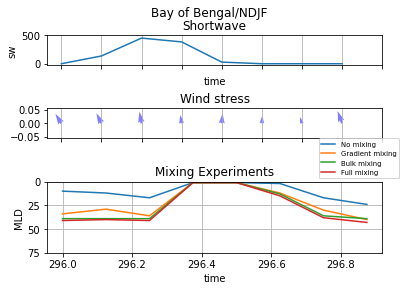

In [82]:
bob_1 = xr.open_dataset("85e15n/output/pwp_output_exp2_run1.nc")
bob_2 = xr.open_dataset("85e15n/output/pwp_output_exp2_run2.nc")
bob_3 = xr.open_dataset("85e15n/output/pwp_output_exp2_run3.nc")
bob_4 = xr.open_dataset("85e15n/output/pwp_output_exp2_run4.nc")

forcing_file_bob = xr.open_dataset("85e15n/input_data/forcings_85e15n.nc")

bob_1 = bob_1.sel(time=slice('296.', '297.'))
bob_2 = bob_2.sel(time=slice('296.', '297.'))
bob_3 = bob_3.sel(time=slice('296.', '297.'))
bob_4 = bob_4.sel(time=slice('296.', '297.'))


plt.figure(figsize=(24,36))
f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[1.25,1.25,3]})
f.subplots_adjust(hspace=1)

forcing_file_bob["sw"].sel(time=slice('296.', '297.')).plot(ax=a0)
a0.set_xticks(ticks=np.arange(296.,297.125,0.125), labels=[])
a0.set_yticks(ticks=[0.,500.])
a0.set_title("Shortwave")
a0.grid(axis='x')

tx = forcing_file_bob["tx"].sel(time=slice('296.', '297.'))
ty = forcing_file_bob["ty"].sel(time=slice('296.', '297.'))
a1.quiver(tx.time.values,0,tx,ty,color='b',
               units='y',
               scale_units='y',
               scale = 2,
               width=0.008,
               alpha=0.5)
a1.set_xticks(ticks=np.arange(296.,297.125,0.125), labels=[])
a1.set_yticks(ticks=[-0.05,0.,0.05], label="N/m2")
a1.set_title("Wind stress")
a1.grid(axis='x')

bob_1["mld"].plot(ax=a2, label="No mixing", subplot_kws={"xlabel":"None"})
bob_2["mld"].plot(ax=a2, label="Gradient mixing", subplot_kws={"xlabel":"None"})
bob_3["mld"].plot(ax=a2, label="Bulk mixing", subplot_kws={"xlabel":"None"})
bob_4["mld"].plot(ax=a2, label="Full mixing", subplot_kws={"xlabel":"None"})

plt.title("Mixing Experiments")
plt.grid(axis='both', which="major")
plt.ylabel("MLD")
a2.legend(fontsize='x-small', bbox_to_anchor=(0.8,1.0))
plt.ylim(75,0)

f.suptitle("Bay of Bengal/NDJF", fontsize=12.)
plt.savefig("bob_dec.pdf")

## Experiment 1 

In [57]:
bob_1 = xr.open_dataset("85e15n/output/pwp_output_exp1_run1.nc")
bob_2 = xr.open_dataset("85e15n/output/pwp_output_exp1_run2.nc")


forcing_file_bob = xr.open_dataset("85e15n/input_data/forcings_85e15n.nc")

In [72]:
bob_1

<xarray.Dataset>
Dimensions:  (z: 251, time: 8)
Coordinates:
  * z        (z) float64 0.0 1.0 2.0 3.0 4.0 ... 246.0 247.0 248.0 249.0 250.0
  * time     (time) float64 296.0 296.1 296.2 296.4 296.5 296.6 296.8 296.9
Data variables:
    temp     (z, time) float64 ...
    sal      (z, time) float64 ...
    uvel     (z, time) float64 ...
    vvel     (z, time) float64 ...
    dens     (z, time) float64 ...
    mld      (time) float64 ...

(300.0, 0.0)

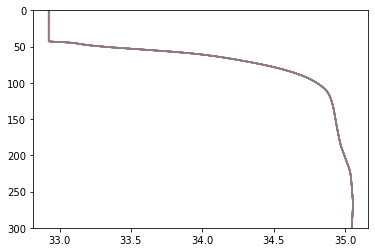

In [62]:
plt.figure()
plt.plot(bob_1["sal"].sel(time="196.").values, bob_1.z.values)
plt.plot(bob_1["sal"].sel(time="196.125").values, bob_1.z.values)
plt.plot(bob_1["sal"].sel(time="196.25").values, bob_1.z.values)
plt.plot(bob_1["sal"].sel(time="196.375").values, bob_1.z.values)
plt.plot(bob_1["sal"].sel(time="196.5").values, bob_1.z.values)
plt.plot(bob_1["sal"].sel(time="196.625").values, bob_1.z.values)
plt.plot(bob_1["sal"].sel(time="196.750").values, bob_1.z.values)
plt.plot(bob_1["sal"].sel(time="197.").values, bob_1.z.values)


plt.ylim(300,0)

(300.0, 0.0)

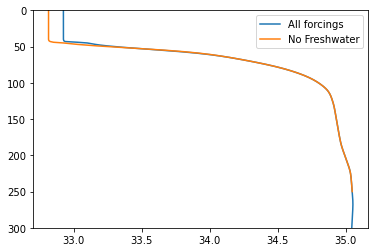

In [67]:
plt.figure()
plt.plot(bob_1["sal"].sel(time="196.5").values, bob_1.z.values, label="All forcings")
plt.plot(bob_2["sal"].sel(time="196.5").values, bob_2.z.values, label="No Freshwater")
plt.legend()
plt.ylim(300,0)

<Figure size 1728x2592 with 0 Axes>

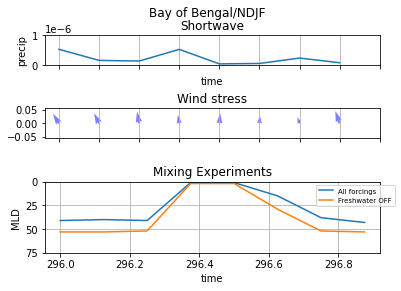

In [88]:
bob_1 = xr.open_dataset("85e15n/output/pwp_output_exp1_run1.nc")
bob_2 = xr.open_dataset("85e15n/output/pwp_output_exp1_run2.nc")

forcing_file_bob = xr.open_dataset("85e15n/input_data/forcings_85e15n.nc")

bob_1 = bob_1.sel(time=slice('296.', '297.'))
bob_2 = bob_2.sel(time=slice('296.', '297.'))

plt.figure(figsize=(24,36))
f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[1.25,1.25,3]})
f.subplots_adjust(hspace=1)

forcing_file_bob["precip"].sel(time=slice('296.', '297.')).plot(ax=a0)
a0.set_xticks(ticks=np.arange(296.,297.125,0.125), labels=[])
a0.set_yticks(ticks=[0.,1e-6])
a0.set_title("Shortwave")
a0.grid(axis='x')

tx = forcing_file_bob["tx"].sel(time=slice('296.', '297.'))
ty = forcing_file_bob["ty"].sel(time=slice('296.', '297.'))
a1.quiver(tx.time.values,0,tx,ty,color='b',
               units='y',
               scale_units='y',
               scale = 2,
               width=0.008,
               alpha=0.5)
a1.set_xticks(ticks=np.arange(296.,297.125,0.125), labels=[])
a1.set_yticks(ticks=[-0.05,0.,0.05], label="N/m2")
a1.set_title("Wind stress")
a1.grid(axis='x')

bob_1["mld"].plot(ax=a2, label="All forcings", subplot_kws={"xlabel":"None"})
bob_2["mld"].plot(ax=a2, label="Freshwater OFF", subplot_kws={"xlabel":"None"})

plt.title("Mixing Experiments")
plt.grid(axis='both', which="major")
plt.ylabel("MLD")
a2.legend(fontsize='x-small', bbox_to_anchor=(0.8,1.0))
plt.ylim(75,0)

f.suptitle("Bay of Bengal/NDJF", fontsize=12.)
plt.savefig("bob_dec.pdf")

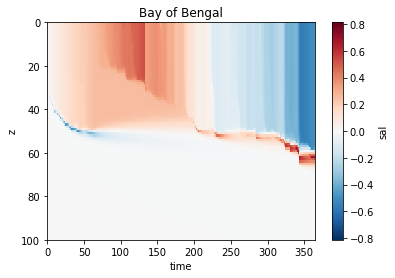

In [98]:
# bob_1["sal"].plot()
# bob_2["sal"].plot()
bob_1 = xr.open_dataset("85e15n/output/pwp_output_exp1_run1.nc")
bob_2 = xr.open_dataset("85e15n/output/pwp_output_exp1_run2.nc")

forcing_file_bob = xr.open_dataset("85e15n/input_data/forcings_85e15n.nc")

new = bob_1["sal"] - bob_2["sal"]
new.plot()
plt.ylim(100,0)
plt.title("Bay of Bengal")
plt.savefig("salt_bob.png")

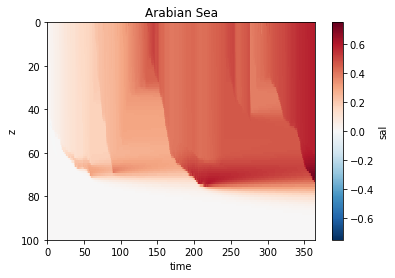

In [99]:
# bob_1["sal"].plot()
# bob_2["sal"].plot()
as_1 = xr.open_dataset("70e15n/output/pwp_output_exp1_run1.nc")
as_2 = xr.open_dataset("70e15n/output/pwp_output_exp1_run2.nc")

forcing_file_as = xr.open_dataset("70e15n/input_data/forcings_70e15n.nc")

new = as_1["sal"] - as_2["sal"]
new.plot()
plt.ylim(100,0)
plt.title("Arabian Sea")
plt.savefig("salt_as.png")